In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Carregamento das bases de dados
## Fundsexplorer
Dataset baixado manualmente do [Ranking do Fundsexplorer](https://www.fundsexplorer.com.br/ranking#upTo--default-fiis-table) e carregado no Kaggle

In [2]:
fiis_class = pd.read_excel('/kaggle/input/fiis-statusinvest/fiis-fundsexplorer (cpia manual).xlsx', header=2)

#tirar valores nulos da coluna subsetor
fiis_class = fiis_class.dropna(subset='SETOR')
if fiis_class.columns[0] == 'Todos os Setores (17)':
    fiis_class = fiis_class.rename(columns={'Todos os Setores (17)' : 'FUNDOS'})

fiis_class

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,PATRIMÔNIO LÍQUIDO,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,VACÂNCIA FÍSICA,VACÂNCIA FINANCEIRA,QUANT. ATIVOS
0,AAZQ11,INDEFINIDO,9.37,798459.91,1.01,0.12,0.0128,0.0366,0.0798,0.0798,...,2.306468e+08,9.60,0.98,0.0146,0.0000,0.0000,0.0000,NaN,NaN,0.0
1,ABCP11,SHOPPINGS,71.95,49725.66,0.78,0.50,0.0070,0.0212,0.0439,0.0889,...,4.325528e+08,91.82,0.78,0.0065,-0.0018,0.0047,0.0712,NaN,NaN,1.0
2,AFHI11,PAPÉIS,96.80,1532097.74,1.01,1.05,0.0107,0.0330,0.0675,0.1308,...,2.897112e+08,94.82,1.02,0.0101,-0.0094,0.0006,0.0500,NaN,NaN,0.0
3,AGRX11,OUTROS,10.59,352356.43,NaN,0.12,0.0108,0.0419,0.0899,0.1578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,AIEC11,LAJES CORPORATIVAS,72.36,649487.97,0.76,0.76,0.0106,0.0337,0.0710,0.1313,...,4.569453e+08,102.56,0.71,0.0073,0.0024,0.0098,0.0940,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,XTED11,LAJES CORPORATIVAS,8.82,17641.88,0.68,11.16,NaN,NaN,NaN,NaN,...,6.737820e+07,28.02,0.31,0.0000,-0.0036,-0.0036,-0.0345,NaN,NaN,1.0
386,YUFI11,FUNDO DE DESENVOLVIMENTO,94.99,184.00,0.93,0.30,0.0037,0.0085,0.0109,0.0109,...,5.009801e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
387,YUFI11B,INDEFINIDO,NaN,NaN,NaN,0.63,0.0000,0.0000,0.0000,0.0000,...,NaN,105.53,NaN,0.0060,-0.0001,0.0059,0.0632,NaN,NaN,0.0
388,ZAVI11,INDEFINIDO,127.74,240356.20,0.94,1.12,0.0088,0.0267,0.0524,0.0788,...,1.586591e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


## Transformando os números percentuais 

In [3]:
fiis_class.iloc[:,6:17] = fiis_class.iloc[:,6:17]*100
fiis_class.iloc[:,6:18]

,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,DY (3M) MÉDIA,DY (6M) MÉDIA,DY (12M) MÉDIA,DY ANO,VARIAÇÃO PREÇO,RENTAB. PERÍODO,RENTAB. ACUMULADA,PATRIMÔNIO LÍQUIDO
0,1.28,3.66,7.98,7.98,1.22,1.33,1.33,7.98,-3.40,-2.16,1.64,2.306468e+08
1,0.70,2.12,4.39,8.89,0.71,0.73,0.74,5.14,0.48,1.18,2.27,4.325528e+08
2,1.07,3.30,6.75,13.08,1.10,1.13,1.09,7.87,-0.89,0.17,9.18,2.897112e+08
3,1.08,4.19,8.99,15.78,1.40,1.50,1.43,10.55,-2.45,-1.40,20.57,NaN
4,1.06,3.37,7.10,13.13,1.12,1.18,1.09,7.37,1.02,2.09,10.89,4.569453e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.737820e+07
386,0.37,0.85,1.09,1.09,0.28,0.18,0.10,1.09,-19.97,-19.68,-23.27,5.009801e+07
387,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN
388,0.88,2.67,5.24,7.88,0.89,0.87,0.88,6.03,0.62,1.50,4.11,1.586591e+08


## Transformando patrimônio em milhões

In [4]:
fiis_class['PATRIMÔNIO LÍQUIDO'] = (fiis_class['PATRIMÔNIO LÍQUIDO']/1000000).round(decimals=2)

fiis_class[['FUNDOS','PATRIMÔNIO LÍQUIDO']]

,FUNDOS,PATRIMÔNIO LÍQUIDO
0,AAZQ11,230.65
1,ABCP11,432.55
2,AFHI11,289.71
3,AGRX11,NaN
4,AIEC11,456.95
...,...,...
385,XTED11,67.38
386,YUFI11,50.10
387,YUFI11B,NaN
388,ZAVI11,158.66


## Statusinvest
Outra base a ser carregada é a [busca avançada de FIIs do Statusinvest](https://statusinvest.com.br/fundos-imobiliarios/busca-avancada):

In [5]:
fiis_status = pd.read_csv('/kaggle/input/fiis-statusinvest/fiis-statusinvest-busca-avancada.csv', sep = ';')
fiis_status

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,GESTAO,N COTAS
0,ABCP11,"71,95","0,500000","7,95","91,86","0,78","49.725,66","1,53","13,72","-6,56","432.552.807,00","17.906,00",Passiva,"4.709.082,00"
1,AFHI11,"96,80","1,050000","13,04","95,95","1,01","1.532.097,74","2,10",NaN,NaN,"289.711.187,37","22.313,00",Ativa,"3.019.453,00"
2,AIEC11,"72,36","0,760000","12,51","94,70","0,76","649.487,97","2,47",NaN,NaN,"456.945.283,72","15.088,00",Ativa,"4.824.987,00"
3,ALMI11,"760,00","0,371133","0,00","2.030,94","0,37","70.618,29","2,24",NaN,"-13,78","225.793.787,83","2.367,00",Passiva,"111.177,00"
4,ALZC11,"0,00",NaN,"0,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1.000.000,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,XPPR11,"22,71","0,100000","10,57","70,49","0,32","311.073,69","3,67","-29,33","-36,13","515.697.388,77","61.991,00",Ativa,"7.316.171,00"
467,XPSF11,"8,65","0,075000","10,59","8,81","0,98","721.539,03","1,24","0,78","-3,11","381.685.180,11","46.486,00",Ativa,"43.302.140,00"
468,YUFI11,"94,99","0,297990","3,06","101,69","0,93","184,00","13,17",NaN,NaN,"50.098.006,90","55,00",Ativa,"492.650,00"
469,ZAVI11,"127,74","1,120000","8,74","135,22","0,94","240.356,20","6,33",NaN,NaN,"158.659.136,14","3.311,00",Ativa,"1.173.322,00"


In [6]:
fiis_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   TICKER                   471 non-null    object
 1   PRECO                    471 non-null    object
 2   ULTIMO DIVIDENDO         395 non-null    object
 3   DY                       471 non-null    object
 4   VALOR PATRIMONIAL COTA   451 non-null    object
 5   P/VP                     372 non-null    object
 6   LIQUIDEZ MEDIA DIARIA    339 non-null    object
 7   PERCENTUAL EM CAIXA      439 non-null    object
 8   CAGR DIVIDENDOS 3 ANOS   193 non-null    object
 9    CAGR VALOR CORA 3 ANOS  205 non-null    object
 10  PATRIMONIO               451 non-null    object
 11  N COTISTAS               451 non-null    object
 12  GESTAO                   442 non-null    object
 13   N COTAS                 471 non-null    object
dtypes: object(14)
memory usage: 51.6+ KB


### Formatação dos números no DataFrame statusinvest

Nota-se que os os dados estão em formato brasileiro, pontos (.) separando casas de milhar e vírgulas (,) separando as casas decimais.
Será feito o ajuste de imediato

In [7]:
fiis_status = fiis_status.apply(lambda x: x.str.replace('.', ''))
fiis_status = fiis_status.apply(lambda x: x.str.replace(',', '.'))
colunas = fiis_status.columns.to_list()
colunas.remove('TICKER')
colunas.remove('GESTAO')

for x in colunas:
   fiis_status[x] = pd.to_numeric(fiis_status[x], downcast="float")

print(fiis_status.info())
fiis_status.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TICKER                   471 non-null    object 
 1   PRECO                    471 non-null    float64
 2   ULTIMO DIVIDENDO         395 non-null    float32
 3   DY                       471 non-null    float32
 4   VALOR PATRIMONIAL COTA   451 non-null    float64
 5   P/VP                     372 non-null    float32
 6   LIQUIDEZ MEDIA DIARIA    339 non-null    float64
 7   PERCENTUAL EM CAIXA      439 non-null    float32
 8   CAGR DIVIDENDOS 3 ANOS   193 non-null    float32
 9    CAGR VALOR CORA 3 ANOS  205 non-null    float32
 10  PATRIMONIO               451 non-null    float64
 11  N COTISTAS               451 non-null    float32
 12  GESTAO                   442 non-null    object 
 13   N COTAS                 471 non-null    float64
dtypes: float32(7), float64(5),

/tmp/ipykernel_32/927534397.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fiis_status = fiis_status.apply(lambda x: x.str.replace('.', ''))


,TICKER,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,GESTAO,N COTAS
0,ABCP11,71.95,0.500000,7.95,91.86,0.78,49725.66,1.53,13.72,-6.56,4.325528e+08,17906.0,Passiva,4709082.0
1,AFHI11,96.80,1.050000,13.04,95.95,1.01,1532097.74,2.10,NaN,NaN,2.897112e+08,22313.0,Ativa,3019453.0
2,AIEC11,72.36,0.760000,12.51,94.70,0.76,649487.97,2.47,NaN,NaN,4.569453e+08,15088.0,Ativa,4824987.0
3,ALMI11,760.00,0.371133,0.00,2030.94,0.37,70618.29,2.24,NaN,-13.78,2.257938e+08,2367.0,Passiva,111177.0
4,ALZC11,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000.0


Para padronizar com a base do Fundsexplorer, vamos transformar o patrimônio em milhões

In [8]:
fiis_status['PATRIMONIO'] = (fiis_status['PATRIMONIO']/1000000).round(decimals=2)
fiis_status[['TICKER','PATRIMONIO']]

,TICKER,PATRIMONIO
0,ABCP11,432.55
1,AFHI11,289.71
2,AIEC11,456.95
3,ALMI11,225.79
4,ALZC11,NaN
...,...,...
466,XPPR11,515.70
467,XPSF11,381.69
468,YUFI11,50.10
469,ZAVI11,158.66


As colunas desta tabela são:

In [9]:
fiis_status.columns

Index(['TICKER', 'PRECO', 'ULTIMO DIVIDENDO', 'DY', 'VALOR PATRIMONIAL COTA',
       'P/VP', 'LIQUIDEZ MEDIA DIARIA', 'PERCENTUAL EM CAIXA',
       'CAGR DIVIDENDOS 3 ANOS', ' CAGR VALOR CORA 3 ANOS', 'PATRIMONIO',
       'N COTISTAS', 'GESTAO', ' N COTAS'],
      dtype='object')

Comparando a quantidade de fundos imobiliários em cada tabela carregada.

In [10]:
print(f'Quantidade de fundos carregados: \nFunds Explorer: {fiis_class.shape[0]} \n  Statusinvest: {fiis_status.shape[0]}')

Quantidade de fundos carregados: 
Funds Explorer: 390 
  Statusinvest: 471


## IFIX

Notou-se que algumas amostras não têm dados e é preciso algum critério para classificar se o FII é descartável ou não.

Portanto, em caso de dúvida, utilizarei como referência os fundos que compõem o [Índice de Fundos de Investimentos Imobiliários (IFIX B3)]('https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/indice-de-fundos-de-investimentos-imobiliarios-ifix.htm') como importantes de se manter e os demais quando descartáveis.


In [11]:
ifix = pd.read_csv('/kaggle/input/fiis-statusinvest/IFIX.csv', sep=';', header=1, encoding='latin-1')

#realocando as colunas que foram carregadas deslocadas para frente
colunas = list(ifix.columns)
colunas.pop(0)
ifix.drop('Part. (%)', axis='columns', inplace=True)
ifix.columns=colunas

#excluindo as linhas sem dados
ifix = ifix.dropna()

ifix = ifix.apply(lambda x: x.str.replace(',', '.'))

#selecionando apenas a colunas relevante

ifix = ifix['Part. (%)']
ifix = ifix.rename('ifix')
ifix= pd.to_numeric(ifix, errors= 'coerce')
ifix

CACR11    0.339
BPFF11    0.275
AFHI11    0.296
ALZR11    0.900
RZAT11    0.283
          ...  
XPIN11    0.499
XPLG11    2.579
XPML11    2.493
XPPR11    0.139
XPSF11    0.315
Name: ifix, Length: 111, dtype: float64

In [12]:
ifix.sort_values(ascending=False)

KNIP11    6.236
KNCR11    4.758
HGLG11    4.519
KNRI11    3.234
XPLG11    2.579
          ...  
VSLH11    0.099
ARRI11    0.099
TORD11    0.080
JPPA11    0.077
CARE11    0.058
Name: ifix, Length: 111, dtype: float64

# Fusão das tabelas

Primeiramente, fundiremos as duas principais tabelas, do funds explorer e do status invest:

In [13]:
fiis_temp = fiis_status.merge(right = fiis_class, 
                         how = 'outer',
                        left_on = fiis_status['TICKER'],
                        right_on = fiis_class['FUNDOS'])
fiis_temp = fiis_temp.rename(columns={'key_0': 'ticker'})
fiis_temp[['ticker','TICKER','FUNDOS']]

,ticker,TICKER,FUNDOS
0,ABCP11,ABCP11,ABCP11
1,AFHI11,AFHI11,AFHI11
2,AIEC11,AIEC11,AIEC11
3,ALMI11,ALMI11,ALMI11
4,ALZC11,ALZC11,NaN
...,...,...,...
516,VGIA11,NaN,VGIA11
517,XPCA11,NaN,XPCA11
518,XPID11,NaN,XPID11
519,XTED11,NaN,XTED11


Analisando os fundos listados exclusivamente na tabela do fundsexplorer:

In [14]:
print(f'Quantidade de fundos carregados: \n         Total: {fiis_temp.shape[0]}\nFunds Explorer: {fiis_status.shape[0]} -\n                ____\n     Diferença: {fiis_temp.shape[0]-fiis_status.shape[0]}')

Quantidade de fundos carregados: 
         Total: 521
Funds Explorer: 471 -
                ____
     Diferença: 50


Agora juntando a tabela resultante da fusão com o percentual no IFIX.

In [15]:
fiis = fiis_temp.merge(right = ifix, 
                         how = 'outer',
                        left_on = fiis_temp['ticker'],
                        right_on = ifix.index)

fiis[['key_0','ifix']].dropna()

,key_0,ifix
1,AFHI11,0.296
2,AIEC11,0.293
6,ALZR11,0.900
13,ARRI11,0.099
21,BARI11,0.341
...,...,...
463,XPIN11,0.499
464,XPLG11,2.579
465,XPML11,2.493
466,XPPR11,0.139


## key_0, TICKER e FUNDOS

In [16]:
fiis[['key_0','TICKER','FUNDOS']].query('key_0 != TICKER')

,key_0,TICKER,FUNDOS
471,AAZQ11,NaN,AAZQ11
472,AGRX11,NaN,AGRX11
473,ARCT11,NaN,ARCT11
474,BBGO11,NaN,BBGO11
475,BDIF11,NaN,BDIF11
476,BIDB11,NaN,BIDB11
477,BODB11,NaN,BODB11
478,BTAG11,NaN,BTAG11
479,CDII11,NaN,CDII11
480,CORM11,NaN,CORM11


Todas as colunas `TICKER` e `FUNDOS` são iguais à réplica da `key_0` ou NaN, então podem ser descartadas.

In [17]:
fiis.pop('TICKER')
fiis.pop('FUNDOS')
fiis.pop('ticker')
fiis=fiis.set_index(fiis.key_0) # inplace substitui a dataframe atual
print(fiis.shape)
fiis.pop('key_0')


(521, 41)


key_0
ABCP11      ABCP11
AFHI11      AFHI11
AIEC11      AIEC11
ALMI11      ALMI11
ALZC11      ALZC11
            ...   
VGIA11      VGIA11
XPCA11      XPCA11
XPID11      XPID11
XTED11      XTED11
YUFI11B    YUFI11B
Name: key_0, Length: 521, dtype: object

Renomeando o índice para 'ticker'

In [18]:
fiis.index.names=['ticker']
fiis.sample(n=20)


,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP_x,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,...,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,VACÂNCIA FÍSICA,VACÂNCIA FINANCEIRA,QUANT. ATIVOS,ifix
ticker,,,,,,,,,,,,,,,,,,,,,
ITIP11,78.96,0.790000,12.47,77.83,1.01,84422.91,1.49,NaN,NaN,58.23,...,80.92,0.98,0.0091,-0.0290,-0.0201,0.0257,NaN,NaN,0.0,NaN
LKDV11,997.23,NaN,0.00,997.23,1.00,664835.00,1.05,NaN,NaN,66.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VGIP11,91.06,0.850000,11.07,93.63,0.97,2114744.60,3.36,-7.34,-2.79,1103.69,...,90.67,1.00,0.0050,-0.0178,-0.0129,0.0800,NaN,NaN,0.0,0.901
VTLT11,95.60,0.880000,10.78,101.11,0.95,207696.86,3.16,5.08,-5.62,213.85,...,102.98,0.93,0.0081,0.0005,0.0086,0.0891,NaN,NaN,1.0,0.170
FIGS11,62.74,0.450000,8.11,75.95,0.83,225653.60,0.97,27.25,1.08,216.46,...,99.78,0.63,0.0039,-0.0001,0.0038,0.0438,NaN,NaN,2.0,NaN
JBFO11,92.01,0.540000,7.30,88.56,1.04,55206.00,0.92,NaN,NaN,113.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
MGHT11,65.46,0.600000,13.44,87.53,0.75,144640.94,4.79,5.98,-13.17,115.00,...,85.61,0.76,0.0076,-0.0045,0.0030,-0.0608,NaN,NaN,1.0,NaN
KFOF11,97.34,0.750000,9.24,98.89,0.98,1432768.37,6.67,11.25,-3.99,448.30,...,92.06,1.06,0.0078,-0.0643,-0.0570,0.0611,NaN,NaN,0.0,0.371
CDII11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


# Tratamento das colunas

Pirmeiramente, avaliaremos as colunas do dataset.

As colunas com nomes originais são:

In [19]:
colunas = fiis.columns
colunas

Index(['PRECO', 'ULTIMO DIVIDENDO', 'DY', 'VALOR PATRIMONIAL COTA', 'P/VP_x',
       'LIQUIDEZ MEDIA DIARIA', 'PERCENTUAL EM CAIXA',
       'CAGR DIVIDENDOS 3 ANOS', ' CAGR VALOR CORA 3 ANOS', 'PATRIMONIO',
       'N COTISTAS', 'GESTAO', ' N COTAS', 'SETOR', 'PREÇO ATUAL (R$)',
       'LIQUIDEZ DIÁRIA (R$)', 'P/VP_y', 'ÚLTIMO DIVIDENDO', 'DIVIDEND YIELD',
       'DY (3M) ACUMULADO', 'DY (6M) ACUMULADO', 'DY (12M) ACUMULADO',
       'DY (3M) MÉDIA', 'DY (6M) MÉDIA', 'DY (12M) MÉDIA', 'DY ANO',
       'VARIAÇÃO PREÇO', 'RENTAB. PERÍODO', 'RENTAB. ACUMULADA',
       'PATRIMÔNIO LÍQUIDO', 'VPA', 'P/VPA', 'DY PATRIMONIAL',
       'VARIAÇÃO PATRIMONIAL', 'RENTAB. PATR. PERÍODO',
       'RENTAB. PATR. ACUMULADA', 'VACÂNCIA FÍSICA', 'VACÂNCIA FINANCEIRA',
       'QUANT. ATIVOS', 'ifix'],
      dtype='object')

## Renomeando as colunas

Agora renomearei as colunas com um nome mais amigável para o código:

In [20]:
colunas = {'PRECO': 'preco_status', 
           'ULTIMO DIVIDENDO': 'dividendo_status', 
           'DY': 'dy_status', 
           'VALOR PATRIMONIAL COTA': 'pva_status', 
           'P/VP_x': 'pvp_status',
           'LIQUIDEZ MEDIA DIARIA': 'liquidez_diaria', 
           'PERCENTUAL EM CAIXA': 'perc_caixa',
           'CAGR DIVIDENDOS 3 ANOS': 'cagr_div_3a', 
           ' CAGR VALOR CORA 3 ANOS': 'cagr_valor_3a', 
           'PATRIMONIO': 'patr_milhoes_status',
           'N COTISTAS': 'n_cotistas', 
           'GESTAO': 'gestao',
           ' N COTAS': 'n_cotas_status',
          'SETOR': 'subsetor',
          'PREÇO ATUAL (R$)': 'preco_funds', 
          'LIQUIDEZ DIÁRIA (R$)': 'liq_diaria_funds', 
          'P/VP': 'pvp_funds',
          'ÚLTIMO DIVIDENDO': 'ult_dividendo_funds', 
          'DIVIDEND YIELD': 'dy_funds', 
          'DY (3M) ACUMULADO': 'dy_3m_acum',
          'DY (6M) ACUMULADO': 'dy_6m_acum', 
          'DY (12M) ACUMULADO': 'dy_12m_acum', 
          'DY (3M) MÉDIA': 'dy_3m_media',
          'DY (6M) MÉDIA': 'dy_6m_media', 
          'DY (12M) MÉDIA': 'dy_12m_media', 
          'DY ANO':'dy_ano_funds', 
          'VARIAÇÃO PREÇO': 'var_preco',
          'RENTAB. PERÍODO': 'rentabilidade', 
          'RENTAB. ACUMULADA': 'rentabilidade_acum', 
          'PATRIMÔNIO LÍQUIDO': 'patr_milhoes_funds', 
          'VPA': 'vpa_funds',
          'P/VPA': 'pvpa_funds', 
          'DY PATRIMONIAL': 'dy_patr', 
          'VARIAÇÃO PATRIMONIAL': 'var_patr',
          'RENTAB. PATR. PERÍODO': 'rentab_patr', 
          'RENTAB. PATR. ACUMULADA': 'rentab_patr_acum', 
          'VACÂNCIA FÍSICA': 'vac_fisica',
          'VACÂNCIA FINANCEIRA': 'vac_fincanceira', 
          'QUANT. ATIVOS': 'quant_ativos',
          'ifix': 'ifix'}


In [21]:
fiis.rename(columns=colunas,inplace=True)
fiis.head()

,preco_status,dividendo_status,dy_status,pva_status,pvp_status,liquidez_diaria,perc_caixa,cagr_div_3a,cagr_valor_3a,patr_milhoes_status,...,vpa_funds,pvpa_funds,dy_patr,var_patr,rentab_patr,rentab_patr_acum,vac_fisica,vac_fincanceira,quant_ativos,ifix
ticker,,,,,,,,,,,,,,,,,,,,,
ABCP11,71.95,0.500000,7.95,91.86,0.78,49725.66,1.53,13.72,-6.56,432.55,...,91.82,0.78,0.0065,-0.0018,0.0047,0.0712,NaN,NaN,1.0,NaN
AFHI11,96.80,1.050000,13.04,95.95,1.01,1532097.74,2.10,NaN,NaN,289.71,...,94.82,1.02,0.0101,-0.0094,0.0006,0.0500,NaN,NaN,0.0,0.296
AIEC11,72.36,0.760000,12.51,94.70,0.76,649487.97,2.47,NaN,NaN,456.95,...,102.56,0.71,0.0073,0.0024,0.0098,0.0940,NaN,NaN,2.0,0.293
ALMI11,760.00,0.371133,0.00,2030.94,0.37,70618.29,2.24,NaN,-13.78,225.79,...,2046.78,0.37,0.0000,-0.0005,-0.0005,0.0090,NaN,NaN,1.0,NaN
ALZC11,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Colunas de preço

As duas colunas vêm de bases de dados diferentes:
* `preco_status` do statusinvest e 
* `preco_funds` do fundsexplorer

In [22]:
fiis[['preco_status','preco_funds','ifix']] = fiis[['preco_status','preco_funds','ifix']].fillna(0)
fiis['preco'] = fiis[['preco_status','preco_funds']].max(axis=1)
print(f'FIIs com preço R$ 0.00: {fiis.preco.where(fiis.preco == 0).count()}')
fiis[['preco','preco_status','preco_funds','ifix','liq_diaria_funds']].sample(n=15)


FIIs com preço R$ 0.00: 95


,preco,preco_status,preco_funds,ifix,liq_diaria_funds
ticker,,,,,
BLMO11,20538.00,20538.00,20538.00,0.000,20538.00
RFOF11,80.10,80.10,80.10,0.000,68545.46
RZAG11,9.64,0.00,9.64,0.000,2756562.23
MFCR11,103.90,103.90,0.00,0.000,NaN
BRHT11B,86.80,86.80,0.00,0.000,NaN
RBLG11,100.50,100.50,100.50,0.000,2450.70
AGRX11,10.59,0.00,10.59,0.000,352356.43
CVPR11,0.00,0.00,0.00,0.000,NaN
BLMG11,66.66,66.66,66.66,0.213,526084.97


Portanto as colunas `preco_status` e `preco_funds` podem ser destacadas

In [23]:
fiis.pop('preco_status')
fiis.pop('preco_funds')
fiis.columns

Index(['dividendo_status', 'dy_status', 'pva_status', 'pvp_status',
       'liquidez_diaria', 'perc_caixa', 'cagr_div_3a', 'cagr_valor_3a',
       'patr_milhoes_status', 'n_cotistas', 'gestao', 'n_cotas_status',
       'subsetor', 'liq_diaria_funds', 'P/VP_y', 'ult_dividendo_funds',
       'dy_funds', 'dy_3m_acum', 'dy_6m_acum', 'dy_12m_acum', 'dy_3m_media',
       'dy_6m_media', 'dy_12m_media', 'dy_ano_funds', 'var_preco',
       'rentabilidade', 'rentabilidade_acum', 'patr_milhoes_funds',
       'vpa_funds', 'pvpa_funds', 'dy_patr', 'var_patr', 'rentab_patr',
       'rentab_patr_acum', 'vac_fisica', 'vac_fincanceira', 'quant_ativos',
       'ifix', 'preco'],
      dtype='object')

Todos os fiis sem dados de preço (0.00) não compõem o IFIX, conforme mostrado abaixo.

In [24]:

fiis[['preco','ifix']][(fiis.preco==0) & (fiis.ifix>0)].shape


(0, 2)

Foi verificado que os FIIs sem quantidade de cotas e com preço R$ 0,00 já deixaram de existir.

In [25]:
fiis = fiis[(fiis.n_cotas_status>0) | (fiis.preco>0)]


Observando os fundos que têm valores diferentes entre as fontes Fundsexplorer e Statusinvest:

In [26]:
fiis['patrimonio_milhoes'] = np.where(pd.isna(fiis.patr_milhoes_funds), fiis.patr_milhoes_status, fiis.patr_milhoes_funds)

fiis[['patrimonio_milhoes','patr_milhoes_funds','patr_milhoes_status']][(fiis.patr_milhoes_status != fiis.patr_milhoes_funds) & (pd.notna(fiis.patr_milhoes_status) & pd.notna(fiis.patr_milhoes_funds))]

,patrimonio_milhoes,patr_milhoes_funds,patr_milhoes_status
ticker,,,
KINP11,26.41,26.41,0.0
LAVF11,0.12,0.12,0.0


E os Fundos onde não há resultado em ambas fontes:

In [27]:
fiis[['patrimonio_milhoes','patr_milhoes_funds','patr_milhoes_status']][fiis.patrimonio_milhoes==0]

,patrimonio_milhoes,patr_milhoes_funds,patr_milhoes_status
ticker,,,
FVBI11,0.0,NaN,0.0
HBTT11,0.0,NaN,0.0
LATR11B,0.0,NaN,0.0
RBCB11,0.0,NaN,0.0
TORM13,0.0,NaN,0.0
TOUR11,0.0,NaN,0.0


In [28]:
fiis.pop('patr_milhoes_funds')
fiis.pop('patr_milhoes_status')


ticker
ABCP11    432.55
AFHI11    289.71
AIEC11    456.95
ALMI11    225.79
ALZC11       NaN
           ...  
VCRA11       NaN
VGIA11       NaN
XPCA11       NaN
XPID11       NaN
XTED11       NaN
Name: patr_milhoes_status, Length: 504, dtype: float64

## Avaliando dividend yield

In [29]:
fiis = fiis[(fiis.dy_status>0) | fiis.dy_12m_acum>0]


In [30]:
fiis.dy_status = np.where(pd.isna(fiis.dy_status), fiis.dy_12m_acum, fiis.dy_status)
fiis = fiis.rename(columns={'dy_status':'dy'})
fiis.pop('dy_12m_acum')
fiis


,dividendo_status,dy,pva_status,pvp_status,liquidez_diaria,perc_caixa,cagr_div_3a,cagr_valor_3a,n_cotistas,gestao,...,dy_patr,var_patr,rentab_patr,rentab_patr_acum,vac_fisica,vac_fincanceira,quant_ativos,ifix,preco,patrimonio_milhoes
ticker,,,,,,,,,,,,,,,,,,,,,
ABCP11,0.500,7.95,91.86,0.78,49725.66,1.53,13.720000,-6.56,17906.0,Passiva,...,0.0065,-0.0018,0.0047,0.0712,NaN,NaN,1.0,0.000,71.95,432.55
AFHI11,1.050,13.04,95.95,1.01,1532097.74,2.10,NaN,NaN,22313.0,Ativa,...,0.0101,-0.0094,0.0006,0.0500,NaN,NaN,0.0,0.296,96.80,289.71
AIEC11,0.760,12.51,94.70,0.76,649487.97,2.47,NaN,NaN,15088.0,Ativa,...,0.0073,0.0024,0.0098,0.0940,NaN,NaN,2.0,0.293,72.36,456.95
ALZM11,0.709,12.07,92.47,1.00,84176.74,4.39,NaN,NaN,3772.0,Ativa,...,0.0107,0.0233,0.0343,0.0823,NaN,NaN,0.0,0.000,92.67,63.91
ALZR11,0.825,12.41,106.44,1.09,2720747.11,30.00,30.790001,-3.18,139441.0,Ativa,...,0.0068,-0.0003,0.0065,0.0726,NaN,NaN,13.0,0.900,116.45,1049.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SNID11,NaN,7.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,100.04,NaN
VCRA11,NaN,15.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0116,0.0022,0.0138,0.0287,NaN,NaN,0.0,0.000,95.87,471.37
VGIA11,NaN,17.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0137,-0.0030,0.0106,0.0929,NaN,NaN,0.0,0.000,9.54,821.09


In [31]:
fiis.columns

Index(['dividendo_status', 'dy', 'pva_status', 'pvp_status', 'liquidez_diaria',
       'perc_caixa', 'cagr_div_3a', 'cagr_valor_3a', 'n_cotistas', 'gestao',
       'n_cotas_status', 'subsetor', 'liq_diaria_funds', 'P/VP_y',
       'ult_dividendo_funds', 'dy_funds', 'dy_3m_acum', 'dy_6m_acum',
       'dy_3m_media', 'dy_6m_media', 'dy_12m_media', 'dy_ano_funds',
       'var_preco', 'rentabilidade', 'rentabilidade_acum', 'vpa_funds',
       'pvpa_funds', 'dy_patr', 'var_patr', 'rentab_patr', 'rentab_patr_acum',
       'vac_fisica', 'vac_fincanceira', 'quant_ativos', 'ifix', 'preco',
       'patrimonio_milhoes'],
      dtype='object')

## Unificando colunas de Preço por Valor Patrimonial (PVP)

In [32]:
fiis[['pvp_status','P/VP_y']]
fiis.pvp_status = np.where(pd.isna(fiis.pvp_status), fiis["P/VP_y"], fiis.pvp_status)
fiis = fiis.rename(columns={'pvp_status':'pvp'})
fiis.pop('P/VP_y')
fiis


,dividendo_status,dy,pva_status,pvp,liquidez_diaria,perc_caixa,cagr_div_3a,cagr_valor_3a,n_cotistas,gestao,...,dy_patr,var_patr,rentab_patr,rentab_patr_acum,vac_fisica,vac_fincanceira,quant_ativos,ifix,preco,patrimonio_milhoes
ticker,,,,,,,,,,,,,,,,,,,,,
ABCP11,0.500,7.95,91.86,0.78,49725.66,1.53,13.720000,-6.56,17906.0,Passiva,...,0.0065,-0.0018,0.0047,0.0712,NaN,NaN,1.0,0.000,71.95,432.55
AFHI11,1.050,13.04,95.95,1.01,1532097.74,2.10,NaN,NaN,22313.0,Ativa,...,0.0101,-0.0094,0.0006,0.0500,NaN,NaN,0.0,0.296,96.80,289.71
AIEC11,0.760,12.51,94.70,0.76,649487.97,2.47,NaN,NaN,15088.0,Ativa,...,0.0073,0.0024,0.0098,0.0940,NaN,NaN,2.0,0.293,72.36,456.95
ALZM11,0.709,12.07,92.47,1.00,84176.74,4.39,NaN,NaN,3772.0,Ativa,...,0.0107,0.0233,0.0343,0.0823,NaN,NaN,0.0,0.000,92.67,63.91
ALZR11,0.825,12.41,106.44,1.09,2720747.11,30.00,30.790001,-3.18,139441.0,Ativa,...,0.0068,-0.0003,0.0065,0.0726,NaN,NaN,13.0,0.900,116.45,1049.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SNID11,NaN,7.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,100.04,NaN
VCRA11,NaN,15.52,NaN,0.98,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0116,0.0022,0.0138,0.0287,NaN,NaN,0.0,0.000,95.87,471.37
VGIA11,NaN,17.38,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0137,-0.0030,0.0106,0.0929,NaN,NaN,0.0,0.000,9.54,821.09


## Colunas 'subsetor' e 'setor'

Outra observação importante é criar uma coluna de 'setor'. Se você observou, anteriormente eu substituí setor por subsetor.

Conforme o artigo da Infomoney [Fundos Imobiliários de Tijolo, papel e híbridos](https://www.infomoney.com.br/guias/fundos-imobiliarios-tijolo-papel-hibrido/), "cada um desses três tipos de FIIs têm suas peculiaridades em relação à gestão e aos tipos de ativos nos quais investem".

Na sequência, o artigo continua sobre os **Títulos de Tijolo**: 

> O fundo imobiliário de “tijolo” é o tipo de FII que investe o seu patrimônio diretamente em imóveis. Esses espaços podem estar em zonas urbanas ou rurais, e podem ter destinação comercial ou residencial – os últimos ainda não são tão comuns.
> Basicamente, o objetivo de um fundo de “tijolo” é obter retorno com a locação dos ativos imobiliários. Ou seja, a receita com aluguel dos imóveis vai para o patrimônio do fundo, e é distribuída aos investidores sob a forma de dividendos, de acordo com a quantidade de cotas que cada um possui.

São subdivididos por:

* Lajes corporativas
* Shoppings
* Galpões logísticos
* Hospitais
* Hotelaria
* Residenciais
* Agências bancárias e educação

Cada um deles é detalhado no artigo, e sugiro fortemente de ler o artigo completo.

Na sequência o artigo explica os **Fundos de Papel**:

> Também chamados de fundos de recebíveis, esses fundos são compostos por títulos relacionados ao setor imobiliário. Diferentemente dos fundos de “tijolo”, esses FIIs não possuem imóveis em seu patrimônio. Em vez disso, o gestor do fundo investe em papéis que representam direitos de créditos imobiliários, conforme veremos a seguir.
> Basicamente, os FIIs de”papel” são compostos por títulos de renda fixa como Letras de Crédito Imobiliário (LCIs), Certificados de Recebíveis Imobiliários (CRIs) e Letras Hipotecárias (LHs).

**Fundos híbridos** basicamente são compostos por ativos de papel e de tijolo.

Portanto, nos momentos seguintes vou agrupar esses numa nova coluna de Setor.

Avaliando os dados únicos de subsetor, temos (eliminando os dados vazios):

In [33]:
#alterar coluna 'subsetor' para caixa baixa
fiis.subsetor = fiis.subsetor.str.lower()

# substituir papéis por recebíveis, pois papéis será o setor
fiis['subsetor'] = fiis.subsetor.replace({'papéis': 'recebíveis'})

# lista valores únicos
fiis.subsetor.unique()

array(['shoppings', 'recebíveis', 'lajes corporativas', 'fundo de fundos',
       'misto', nan, 'imóveis residenciais', 'agências de bancos',
       'indefinido', 'imóveis industriais e logísticos',
       'fundo de desenvolvimento', 'varejo', 'educacional', 'hospitalar',
       'hotéis', 'imóveis comerciais - outros', 'outros'], dtype=object)

In [34]:
fiis.query("subsetor=='misto'")
#fiis_class[fiis_class.ticker.str.contains('AG')] # FF (FoF), AG (agro), CR (recebíveis)
#fiis.isin()

#OLHAR INDIVIDUALMENTE OS FIIS 'outros' e 'indefinidos'

,dividendo_status,dy,pva_status,pvp,liquidez_diaria,perc_caixa,cagr_div_3a,cagr_valor_3a,n_cotistas,gestao,...,dy_patr,var_patr,rentab_patr,rentab_patr_acum,vac_fisica,vac_fincanceira,quant_ativos,ifix,preco,patrimonio_milhoes
ticker,,,,,,,,,,,,,,,,,,,,,
ALZR11,0.825000,12.410000,106.44,1.09,2720747.11,30.00,30.790001,-3.180000,139441.0,Ativa,...,0.0068,-0.0003,0.0065,0.0726,NaN,NaN,13.0,0.900,116.45,1049.51
BTSI11,0.720000,5.460000,122.02,0.86,1143835.25,0.06,NaN,NaN,107.0,Ativa,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.000,105.00,257.87
CARE11,0.008385,0.000000,8.32,0.24,12128.43,0.05,NaN,-23.920000,12008.0,Ativa,...,0.0010,-0.0024,-0.0014,0.0356,NaN,NaN,1.0,0.058,1.96,297.71
EVBI11,0.860900,9.340000,98.00,0.99,172410.71,7.28,NaN,NaN,1047.0,Ativa,...,0.0075,-0.0071,0.0003,0.0770,NaN,NaN,6.0,0.000,97.50,211.08
HGRU11,0.850000,9.010000,123.67,1.05,4222426.74,2.26,11.480000,0.030000,202697.0,Ativa,...,0.0068,-0.0037,0.0031,0.0923,NaN,NaN,71.0,2.014,130.38,2276.33
HSRE11,0.600000,7.310000,93.31,1.10,590205.21,1.41,NaN,NaN,207.0,Ativa,...,0.0065,-0.0004,0.0062,0.0583,NaN,NaN,27.0,0.000,103.01,830.38
JSRE11,0.460000,7.420000,112.85,0.68,3262849.49,0.23,-3.690000,-7.870000,101092.0,Ativa,...,0.0043,0.0000,0.0044,0.0434,NaN,NaN,6.0,1.338,76.80,2343.58
KNRI11,0.950000,7.400000,160.16,1.00,4324764.03,1.89,13.490000,-0.290000,255595.0,Ativa,...,0.0057,-0.0009,0.0047,0.0786,NaN,NaN,19.0,3.234,159.50,3869.08
OURE11,0.800000,14.720000,92.31,0.88,140957.91,1.46,11.100000,-0.600000,6287.0,Ativa,...,0.0114,-0.0216,-0.0104,0.1112,NaN,NaN,4.0,0.000,81.51,99.43


In [35]:
converte_subsetor = {'indefinido': 'outros', 
                     'shoppings': 'fii-tijolo', 
                     'recebíveis': 'fii-papéis', 
                     'outros': 'fiagro',
                     'lajes corporativas': 'fii-tijolo', 
                     'fundo de fundos': 'fii-papéis', 
                     'misto': 'híbrido',
                     'imóveis residenciais': 'fii-tijolo', 
                     'imóveis industriais e logísticos': 'fii-tijolo',
                     'imóveis comerciais - outros': 'fii-tijolo', 
                     'agências de bancos': 'fii-tijolo',
                     'fundo de desenvolvimento': 'fii-tijolo', 
                     'varejo': 'fii-tijolo', 
                     'fiagro': 'fiagro', 
                     'educacional': 'fii-tijolo',
                     'hospitalar': 'fii-tijolo', 
                     'hotéis': 'fii-tijolo'}

fiis['setor'] = fiis['subsetor']
fiis['setor'] = fiis['setor'].replace(converte_subsetor)

fiis[['setor','subsetor']].sample(n=20)
                                       

,setor,subsetor
ticker,,
RECR11,fii-papéis,recebíveis
HDEL11,fii-tijolo,imóveis industriais e logísticos
GSFI11,fii-tijolo,shoppings
FMOF11,fii-tijolo,lajes corporativas
RBRX11,outros,indefinido
RBDS11,fii-tijolo,fundo de desenvolvimento
CPSH11,NaN,NaN
HSAF11,fii-papéis,recebíveis
IAAG11,outros,indefinido


In [36]:
fiis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, ABCP11 to XPID11
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dividendo_status     328 non-null    float32
 1   dy                   373 non-null    float64
 2   pva_status           329 non-null    float64
 3   pvp                  355 non-null    float64
 4   liquidez_diaria      313 non-null    float64
 5   perc_caixa           326 non-null    float32
 6   cagr_div_3a          174 non-null    float32
 7   cagr_valor_3a        186 non-null    float32
 8   n_cotistas           329 non-null    float32
 9   gestao               322 non-null    object 
 10  n_cotas_status       329 non-null    float64
 11  subsetor             351 non-null    object 
 12  liq_diaria_funds     342 non-null    float64
 13  ult_dividendo_funds  351 non-null    float64
 14  dy_funds             345 non-null    float64
 15  dy_3m_acum           345 non-null    

## Análise de fundos imobiliários por setor e subsetor

## Quantidade de fundos

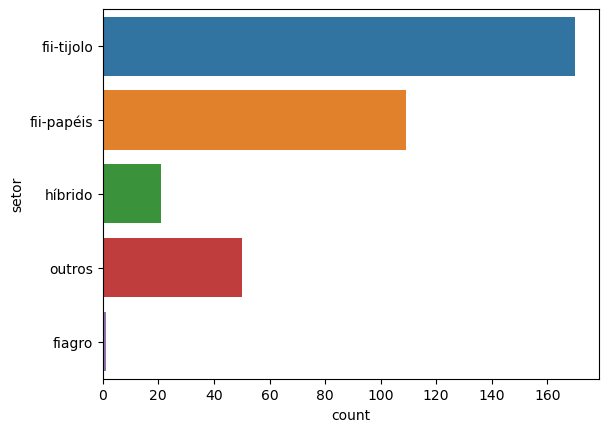

In [37]:
sns.countplot(data = fiis,
               y = 'setor');

<Axes: xlabel='count', ylabel='subsetor'>

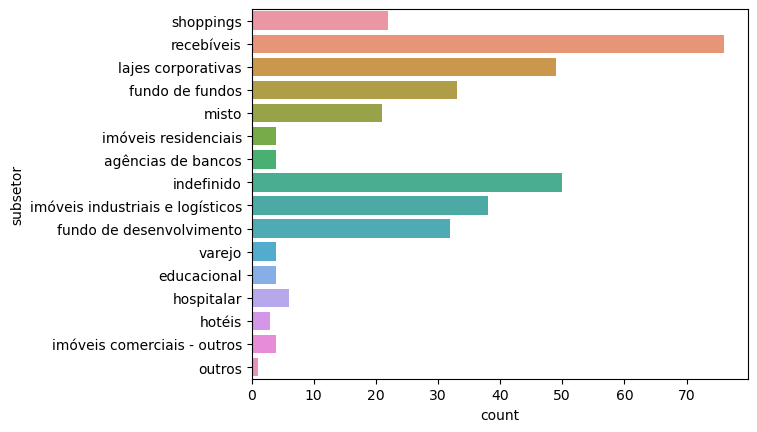

In [38]:
sns.countplot(data = fiis,
               y = 'subsetor')

In [39]:
fiis[['subsetor','pvp', 'patrimonio_milhoes','pvpa_funds','pva_status','preco']].sort_values(by='pvp', 
                                                  ascending=False)

,subsetor,pvp,patrimonio_milhoes,pvpa_funds,pva_status,preco
ticker,,,,,,
SRVD11,indefinido,583.00,-0.65,4.81,-0.01,5.70
IBFF11,fundo de fundos,4.49,9.86,0.92,14.78,66.40
RBRM11,fundo de desenvolvimento,3.44,14.85,NaN,27547.43,94794.81
KINP11,fundo de desenvolvimento,2.66,26.41,2.05,0.00,9.82
LOFT11B,fundo de desenvolvimento,2.49,23.58,NaN,12.02,29.90
...,...,...,...,...,...,...
LSAG11,misto,NaN,NaN,NaN,NaN,106.86
RBIF11,fundo de desenvolvimento,NaN,NaN,NaN,NaN,98.50
RURA11,misto,NaN,NaN,NaN,NaN,10.53


# Correlação

In [40]:
fiis.columns

Index(['dividendo_status', 'dy', 'pva_status', 'pvp', 'liquidez_diaria',
       'perc_caixa', 'cagr_div_3a', 'cagr_valor_3a', 'n_cotistas', 'gestao',
       'n_cotas_status', 'subsetor', 'liq_diaria_funds', 'ult_dividendo_funds',
       'dy_funds', 'dy_3m_acum', 'dy_6m_acum', 'dy_3m_media', 'dy_6m_media',
       'dy_12m_media', 'dy_ano_funds', 'var_preco', 'rentabilidade',
       'rentabilidade_acum', 'vpa_funds', 'pvpa_funds', 'dy_patr', 'var_patr',
       'rentab_patr', 'rentab_patr_acum', 'vac_fisica', 'vac_fincanceira',
       'quant_ativos', 'ifix', 'preco', 'patrimonio_milhoes', 'setor'],
      dtype='object')

<Axes: >

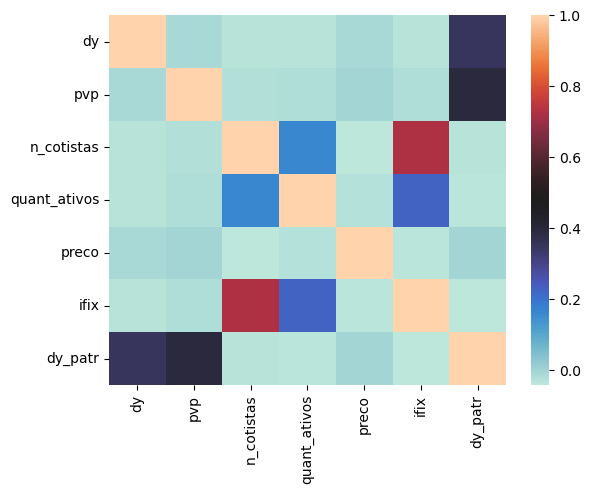

In [41]:
sns.heatmap(fiis[['dy','pvp','n_cotistas','quant_ativos','preco','ifix','dy_patr']].corr(),
           cmap='icefire')

## Preço / Valor patrimonial

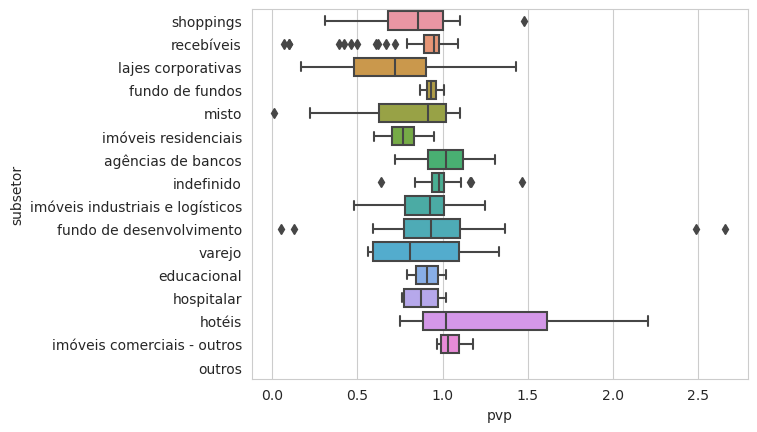

In [42]:
with sns.axes_style('whitegrid'):
    sns.boxplot(x = fiis['pvp'][fiis['pvp']<3],
                y = fiis['subsetor'])

In [43]:
fiis.sort_values(by='dy', ascending=False).head(20)

,dividendo_status,dy,pva_status,pvp,liquidez_diaria,perc_caixa,cagr_div_3a,cagr_valor_3a,n_cotistas,gestao,...,var_patr,rentab_patr,rentab_patr_acum,vac_fisica,vac_fincanceira,quant_ativos,ifix,preco,patrimonio_milhoes,setor
ticker,,,,,,,,,,,,,,,,,,,,,
TCPF11,1.520000,1697.619995,125.27,0.01,NaN,6.490000,NaN,NaN,51.0,Ativa,...,NaN,NaN,NaN,NaN,NaN,0.0,0.000,1.26,37.25,híbrido
VSEC11,0.080000,1042.859985,3.12,0.07,2.50,95.139999,-0.620000,-85.970001,64.0,Ativa,...,NaN,NaN,NaN,NaN,NaN,0.0,0.000,0.21,0.20,fii-papéis
LATR11B,9.998500,202.330002,0.00,NaN,99.50,NaN,NaN,-64.410004,0.0,Ativa,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,9.51,0.00,NaN
STRX11,0.700000,107.040001,163.96,0.05,NaN,0.650000,-73.529999,NaN,55.0,Ativa,...,0.0001,0.0051,0.0595,NaN,NaN,3.0,0.000,8.52,264.55,fii-tijolo
KINP11,3.053493,74.480003,0.00,2.66,38394.20,NaN,NaN,-11.210000,0.0,Ativa,...,-0.0628,-0.0158,0.0104,NaN,NaN,0.0,0.000,9.82,26.41,fii-tijolo
KNRE11,0.037742,59.220001,0.76,0.76,11479.43,16.459999,NaN,-47.889999,6563.0,Ativa,...,-0.2853,-0.0221,-0.0803,NaN,NaN,1.0,0.000,0.58,14.03,fii-tijolo
RDPD11,NaN,48.890000,NaN,1.04,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.3705,-0.3645,-0.3601,NaN,NaN,0.0,0.000,22.96,24.09,fii-papéis
RBOP11,2.400000,33.160000,848.97,0.38,105048.26,7.180000,6.240000,-36.279999,3769.0,Ativa,...,NaN,NaN,NaN,NaN,NaN,2.0,0.000,320.56,86.31,fii-tijolo
RBTS11,2.653693,30.530001,818.64,1.37,22420.00,3.450000,NaN,NaN,60.0,Ativa,...,-0.1641,-0.1213,-0.1221,NaN,NaN,0.0,0.000,1121.00,46.27,fii-tijolo


## Dividend Yield

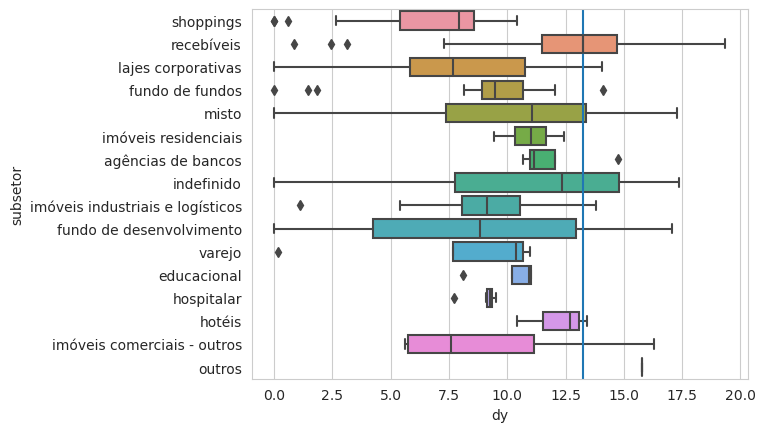

In [44]:
with sns.axes_style('whitegrid'):
    ax = sns.boxplot(x = fiis.dy[fiis['dy']<20],
                y = fiis['subsetor'])
    ax.axvline(x = 13.25)    # Line on x = 2
           

## Patrimônio Líquido

In [45]:
fiis[['subsetor','pvp','patrimonio_milhoes']].sort_values(by = 'patrimonio_milhoes', ascending = False).head(20)

,subsetor,pvp,patrimonio_milhoes
ticker,,,
KNIP11,recebíveis,0.93,7984.13
PBLV11,NaN,0.59,5820.00
KNCR11,recebíveis,0.98,5758.81
HGLG11,imóveis industriais e logísticos,1.06,5176.42
KNRI11,misto,1.00,3869.08
IRDM11,recebíveis,0.92,3262.07
XPLG11,imóveis industriais e logísticos,1.02,3017.11
CPTS11,recebíveis,0.96,2891.18
FTCE11B,NaN,1.02,2764.15


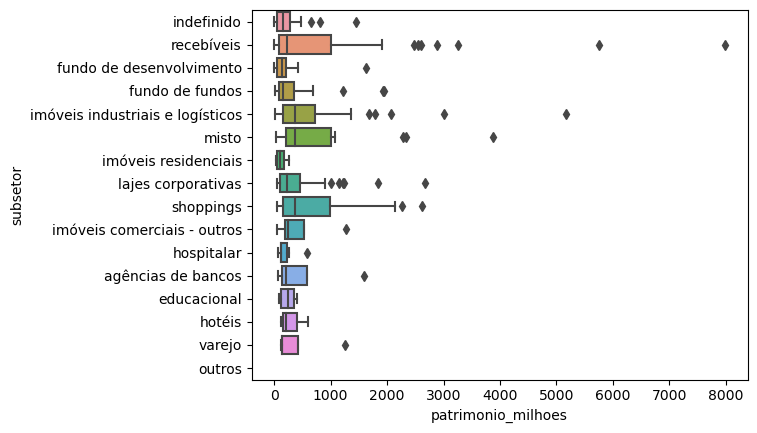

In [46]:
sns.boxplot(data = fiis.sort_values(by='patrimonio_milhoes'),
             y = 'subsetor',
             x = 'patrimonio_milhoes');


## Gráfico comparativo

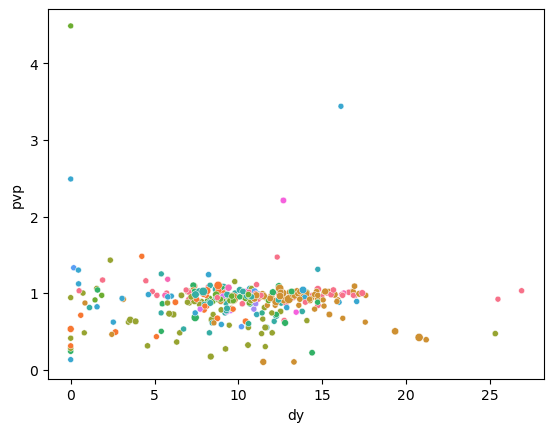

In [51]:
sns.scatterplot(x = fiis.dy[fiis.dy<30], 
                y=fiis.pvp[fiis.pvp<100], 
                size=fiis.patrimonio_milhoes, 
                hue=fiis.subsetor,
               legend=None);

instalar ipywidgets, para filtrar os valores máximos e enxergar.
colocar filtro de subsetores de fiis e todos para olhar individualmente